In [1]:
import sys
sys.path.append('/mnt/lustre01/pf/a/a270046/hierarchy/pyfesom_fork') # ut.py etc. (github)

import matplotlib
#matplotlib.use('Agg') #-- use in batch mode
#matplotlib.use('TkAgg')
from netCDF4 import Dataset, MFDataset
import pyfesom as pf
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pylab as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from matplotlib import cm
from colorbars import cmap_correlations256

#### CORE2 mesh

In [57]:
from collections import OrderedDict

In [58]:
mesh=OrderedDict()

In [59]:
# load the FESOM mesh
meshpath  ='/work/bm0944/input/CORE2_final/' # COREII at DKRZ
mesh['LR'] = pf.load_mesh(meshpath, get3d=True, usepickle=False)

/work/bm0944/input/CORE2_final/pickle_mesh
2
Load 2d part of the grid in 1 second(s)
Load 3d part of the grid in 5 seconds


In [60]:
numlevels=np.sum(mesh['LR'].n32!=-999, axis=1) # for every node

In [61]:
mesh['LR'].topo

array([ 160.,   50.,  490., ...,  580.,  115.,  230.])

In [62]:
mesh['LR'].zlevs[numlevels-1]

array([ 160.,   50.,  490., ...,  580.,  115.,  230.])

#### REF mesh

In [63]:
# load the FESOM mesh
meshpath  ='/work/bm0944/input/mesh_ref87k/' # REF at DKRZ
mesh['REF'] = pf.load_mesh(meshpath, get3d=True, usepickle=False)

/work/bm0944/input/mesh_ref87k/pickle_mesh
2
Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 4 seconds


need to copy oce.diag files for PI ref87k... from where again?

locally at AWI: /csys/nobackup3_CLIDYN/trackow/ECHAM_FESOM/hlrn3_ref87k_piControl (1851--3395)

and I think at HLRN (blogin!) here: /gfs2/work/hbktrack/cpl_output (Erster Teil,1851--2865) /gfs1/work/hbktrack/cpl_output (Zweiter Teil, bis 3395)

TEST: (1950 neu kopiert aus versehen), jetzt 1955
blogin4:/gfs2/work/hbktrack/cpl_output $ cp fesom.1955.oce.mean.nc fesom.1955.oce.mean.checkPIref87k.nc
blogin4:/gfs2/work/hbktrack/cpl_output $ scp fesom.1955.oce.mean.checkPIref87k.nc a270046@mistralpp.dkrz.de:'/work/ab0995/a270046/hierarchy-grids/cpl_output_ref87k/.'
Warning: Permanently added the RSA host key for IP address '136.172.50.63' to the list of known hosts.
a270046@mistralpp.dkrz.de's password: 
fesom.1955.oce.mean.checkPIref87k.nc          100%  658MB  41.1MB/s   00:16


diff /work/ab0995/a270046/hierarchy-grids/cpl_output_ref87k/fesom.1955.oce.mean.nc /work/ab0995/a270046/hierarchy-grids/cpl_output_ref87k/fesom.1955.oce.mean.checkPIref87k.nc

no diff, so

blogin4:/gfs2/work/hbktrack/cpl_output $ scp fesom.{1851..1950}.oce.diag.nc a270046@mistralpp.dkrz.de:'/work/ab0995/a270046/hierarchy-grids/cpl_output_ref87k/.'

#### AGUV mesh

In [65]:
# load the FESOM mesh
meshpath  ='/work/bm0944/input/aguv/' # AGUV at DKRZ
mesh['MR0'] = pf.load_mesh(meshpath, abg=[0, 0, 0], get3d=True, usepickle=False)

/work/bm0944/input/aguv/pickle_mesh
2
Load 2d part of the grid in 6 second(s)
Load 3d part of the grid in 40 seconds


#### GLOB mesh

In [66]:
# load the FESOM mesh
meshpath  ='/work/ab0995/a270046/fesom-meshes/glob/' # GLOB at DKRZ
mesh['MR'] = pf.load_mesh(meshpath, abg=[0, 0, 0], get3d=True, usepickle=False)

/work/ab0995/a270046/fesom-meshes/glob/pickle_mesh
2
Load 2d part of the grid in 6 second(s)
Load 3d part of the grid in 38 seconds


#### BOLD mesh

In [67]:
# load the FESOM mesh
meshpath  ='/work/ab0995/a270067/fesom/bold/mesh_Agulhas/' # BOLD at DKRZ
mesh['HR'] = pf.load_mesh(meshpath, abg=[0, 0, 0], get3d=True, usepickle=False)

/work/ab0995/a270067/fesom/bold/mesh_Agulhas/pickle_mesh
2
Load 2d part of the grid in 10 second(s)
Load 3d part of the grid in 63 seconds


### plot everything

In [104]:
meshname='LR'

m = Basemap(projection='merc',llcrnrlat=35,urcrnrlat=37,\
            llcrnrlon=-7,urcrnrlon=-4,lat_ts=30,resolution='f') #resolution='l'
x, y = m(mesh[meshname].x2, mesh[meshname].y2)

In [74]:
#nlevels = fl.variables['nlevels'][:]
level_data, elem_no_nan = pf.get_data(mesh[meshname].topo, mesh[meshname], depth=0)

For depth 0 model level -0.0 will be used


In [75]:
#elvls = pd.read_csv('/work/ollie/nkolduno/meshes/NEMO_RT/elvls.out', names=['elvls'])

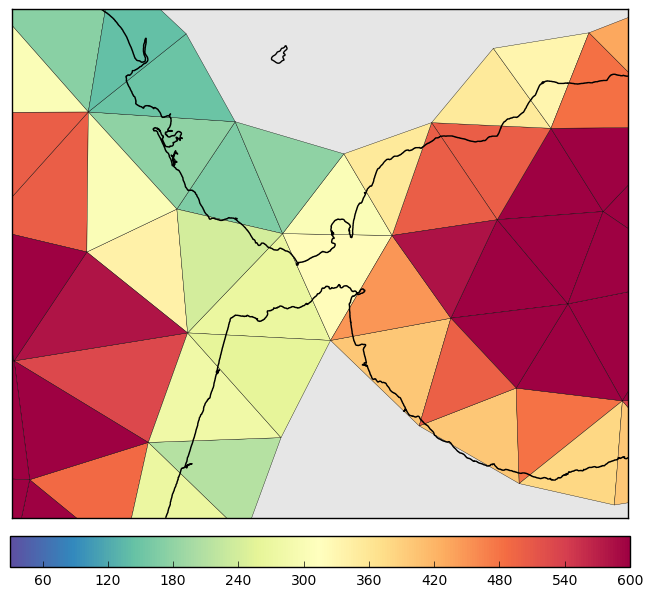

In [105]:
plt.figure(figsize=(8,8))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
mm = plt.tripcolor(x, y, elem_no_nan, level_data,
                   #facecolors=topo[mesh.no_cyclic_elem], \
              edgecolors='k',\
             cmap=cm.Spectral_r, 
             vmin = 30, vmax = 600)
# plt.scatter(x1, y1, 100)
# plt.scatter(xb, yb, 300, marker='x', color='r')
plt.colorbar(mm, orientation='horizontal', pad=0.03);
plt.show()

In [167]:
meshname='LR'

m = Basemap(projection='merc',llcrnrlat=35,urcrnrlat=37,\
            llcrnrlon=-7,urcrnrlon=-4,lat_ts=30,resolution='f') #resolution='l'

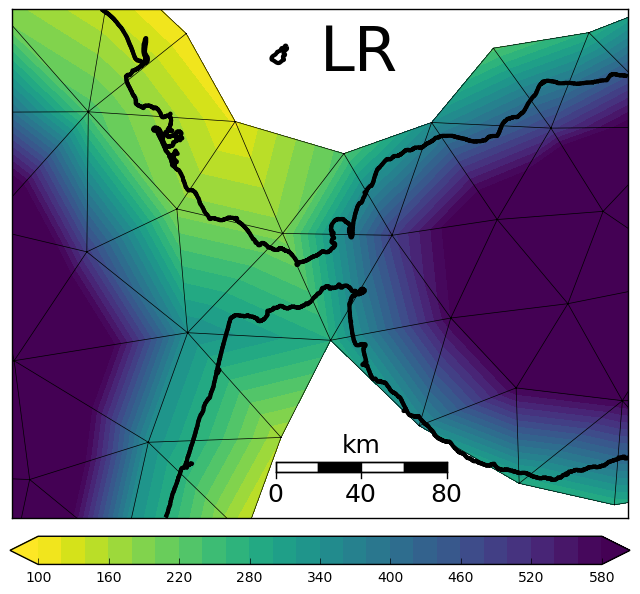

In [179]:
plt.figure(figsize=(8,8))

elem2=mesh[meshname].elem[mesh[meshname].no_cyclic_elem,:]
x, y = m(mesh[meshname].x2, mesh[meshname].y2)

vmin = 100
vmax = 600
step = 20

m.drawmapboundary()
m.drawcoastlines(linewidth=3.0)

# draw a scale
m.drawmapscale(-5.3, 35.2, lon0=-5.5, lat0=36., length=80., units='km', fontsize=18, barstyle='fancy') # lon0,lat0 where scale is calculated

mm = plt.tricontourf(x, y, elem2, mesh[meshname].topo, \
                edgecolor='k',\
             cmap=cm.viridis_r, #cm.viridis_r, #cm.Spectral_r
             levels= np.arange(vmin, vmax, step), #np.linspace(vmin, vmax, steps).astype('int')
                     extend='both')

# contours
plt.triplot(x, y, elem2, lw=0.5,color='k');
#plt.tripcolor(x, y, elem_no_nan, level_data,
#                   #facecolors='none', \
#              edgecolors='k')
#             cmap=cm.Spectral_r, 
#             vmin = vmin, vmax = vmax)

# text
plt.annotate(meshname, xy=(0.5, 0.88), xycoords='axes fraction', fontsize=45)

plt.colorbar(mm, orientation='horizontal', pad=0.03);
plt.show()

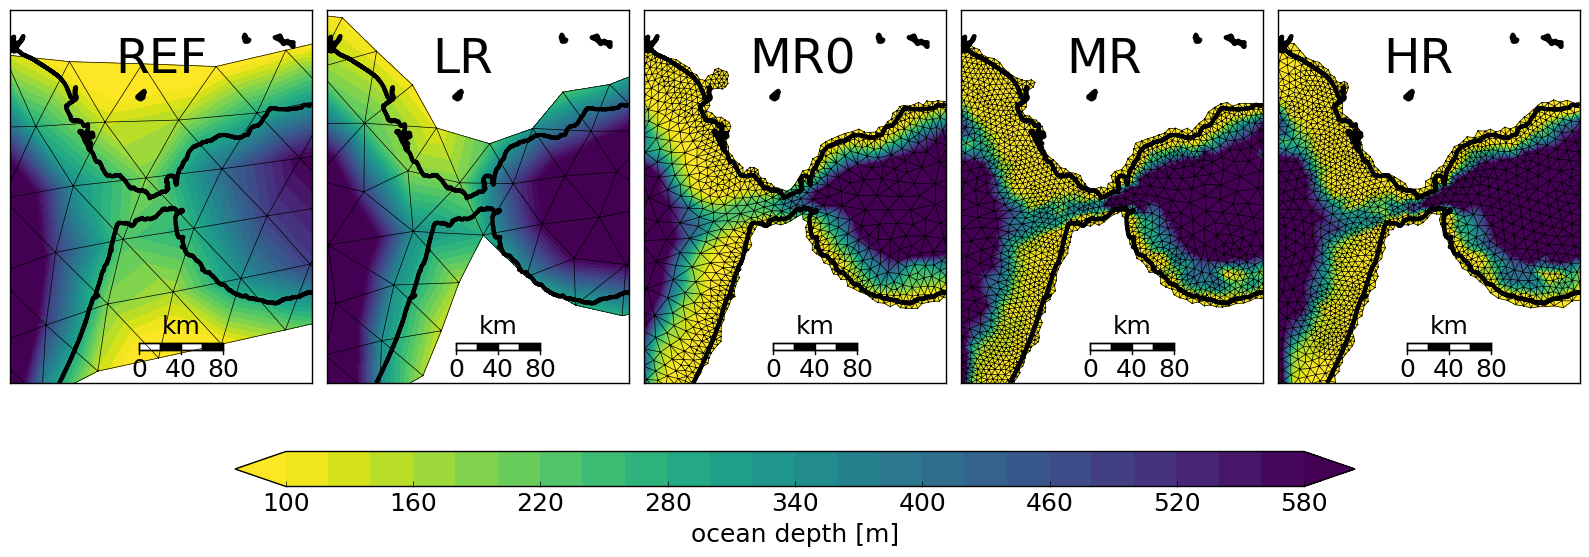

In [188]:
# set minimum and maximum depth [m], and spacing
vmin = 100
vmax = 600
step = 20

fig = plt.figure(figsize=(16,7))

i=1
for meshname in ['REF','LR','MR0','MR','HR']:
    ax = fig.add_subplot(150+i)

    # init Basemap
    m = Basemap(projection='merc',llcrnrlat=34.5,urcrnrlat=37.5,\
            llcrnrlon=-7,urcrnrlon=-4,lat_ts=30,resolution='f') #resolution='l'
    m.drawmapboundary()
    m.drawcoastlines(linewidth=3.0)
    
    # draw a scale
    m.drawmapscale(-5.3, 34.8, lon0=-5.5, lat0=36., length=80., units='km', fontsize=18, barstyle='fancy') # lon0,lat0 where scale is calculated

    # get coordinates
    x, y = m(mesh[meshname].x2, mesh[meshname].y2)
    elem2=mesh[meshname].elem[mesh[meshname].no_cyclic_elem,:]

    # plot topo
    mm = plt.tricontourf(x, y, elem2, mesh[meshname].topo, edgecolor='k',\
            cmap=cm.viridis_r, #cm.viridis_r, #cm.Spectral_r
            levels= np.arange(vmin, vmax, step),
            extend='both')

    # add element contours
    plt.triplot(x, y, elem2, lw=0.5,color='k');
    #plt.colorbar(mm, orientation='horizontal', pad=0.03);
    
    # text
    plt.annotate(meshname, xy=(0.35, 0.83), xycoords='axes fraction', fontsize=35)

    i=i+1

plt.tight_layout()

#fig.subplots_adjust(right=0.8) 
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7]) # Add axes [*left*, *bottom*, *width*,*height*]; in fractions of figure
fig.subplots_adjust(bottom=0.05) 
cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.05]) # Add axes [*left*, *bottom*, *width*,*height*]; in fractions of figure
cbar=fig.colorbar(mm, cax=cbar_ax, orientation='horizontal')
#cbar.ax.set_yticklabels(['0','1','2','>3'])
cbar.set_label('ocean depth [m]', fontsize=18)
cbar.ax.tick_params(labelsize=18) 
plt.show()

In [189]:
saveFIG=True
if saveFIG==True:
   pp = PdfPages('/pf/a/a270046/hierarchy/figuresJuly2018/Gibraltar_zoom_bathy.pdf')
   pp.savefig(fig,bbox_inches = 'tight')
   pp.close()